In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
'punkt',
'wordnet',
'omw-1.4',
'vader_lexicon'
])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Define stop words and initialize lemmatizer
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
#define function to apply the below data preprocessing steps which we can then use on our corpus
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer(r"[a-zA-Z']+").tokenize(text) # Tokenize
  cleaned_tokens = [word. lower() for word in tokenized_document if word. lower() not in stop_words] #Remove
  lemmatized_text = [lemmatizer.lemmatize(word) for word in cleaned_tokens] #lemmatize
  return lemmatized_text

In [ ]:
#Read the three text files
amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None)
imdb = pd.read_csv("imdb_labelled.txt", sep="\t", header=None)
yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None)

In [ ]:
#Join the dataset and save the combined dataset to a new file
reviews = pd.concat([amazon, imdb, yelp], axis=0)
reviews.to_csv('reviews.csv', index=False)

In [ ]:
#read the combined dataset into a dataframe
reviews_df = pd.read_csv('reviews.csv')

In [ ]:
#preview the dataset
reviews_df.columns = ["Text","Target_Label"]
reviews_df.head()

,Text,Target_Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
#drop the target label
reviews_df1 = reviews_df.drop(columns=["Target_Label"])
reviews_df1.head()

,Text
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.


In [ ]:
reviews_df1['Text'].describe()

count                                                  2748
unique                                                 2731
top       If you like a loud buzzing to override all you...
freq                                                      2
Name: Text, dtype: object

In [ ]:
reviews_df1['processed_review'] = reviews_df1['Text'].apply(preprocess_text)
reviews_df1.head()

,Text,processed_review
0,So there is no way for me to plug it in here i...,"[way, plug, u, unless, go, converter]"
1,"Good case, Excellent value.","[good, case, excellent, value]"
2,Great for the jawbone.,"[great, jawbone]"
3,Tied to charger for conversations lasting more...,"[tied, charger, conversation, lasting, minute,..."
4,The mic is great.,"[mic, great]"


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
#We can extract the values from the dictionary and create new columns within our dataframe
reviews_df1['compound'] = [sentiment.polarity_scores(" ".join(review))['compound'] for review in reviews_df1['processed_review']]
reviews_df1['neg'] = [sentiment.polarity_scores(" ".join(review))['neg'] for review in reviews_df1['processed_review']]
reviews_df1['neu'] = [sentiment.polarity_scores(" ".join(review))['neu'] for review in reviews_df1['processed_review']]
reviews_df1['pos'] = [sentiment.polarity_scores(" ".join(review))['pos'] for review in reviews_df1['processed_review']]

In [ ]:
reviews_df1.head()

,Text,processed_review,compound,neg,neu,pos,Target
0,So there is no way for me to plug it in here i...,"[way, plug, u, unless, go, converter]",0.0000,0.00,1.000,0.000,0
1,"Good case, Excellent value.","[good, case, excellent, value]",0.8402,0.00,0.100,0.900,1
2,Great for the jawbone.,"[great, jawbone]",0.6249,0.00,0.196,0.804,1
3,Tied to charger for conversations lasting more...,"[tied, charger, conversation, lasting, minute,...",-0.4019,0.31,0.690,0.000,0
4,The mic is great.,"[mic, great]",0.6249,0.00,0.196,0.804,1


In [ ]:
reviews_df1[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2748.000000,2748.000000,2748.000000,2748.000000
mean,0.177415,0.139536,0.566538,0.292839
std,0.455369,0.239065,0.284458,0.292032
min,-0.937100,0.000000,0.000000,0.000000
25%,-0.051600,0.000000,0.351000,0.000000
50%,0.202300,0.000000,0.536000,0.263000
75%,0.571900,0.237500,0.758000,0.524000
max,0.999000,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

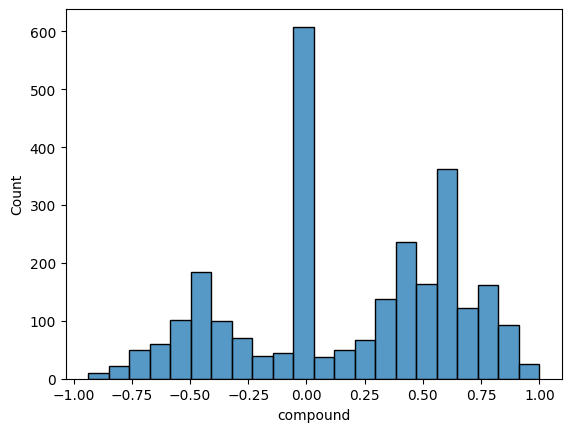

In [ ]:
sns.histplot(reviews_df1['compound'])

<Axes: xlabel='pos', ylabel='Count'>

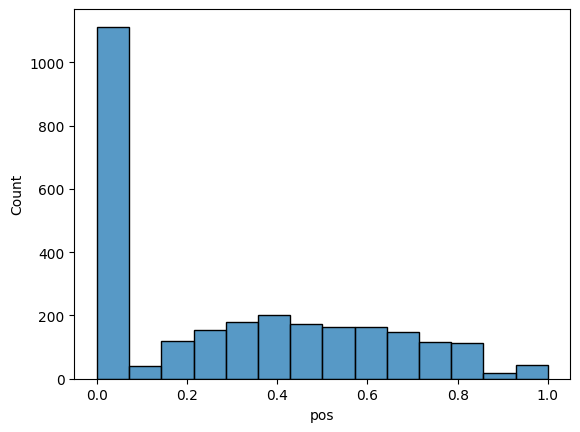

In [ ]:
sns.histplot(reviews_df1['pos'])

<Axes: xlabel='neg', ylabel='Count'>

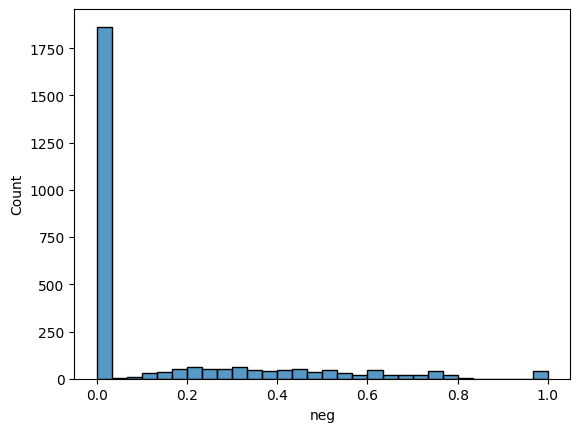

In [ ]:
sns.histplot(reviews_df1['neg'])

In [ ]:
#group the reviews into positive and negative reviews based on the polarity score
positive_reviews = reviews_df1.loc[(reviews_df1['compound']>0), : ]
negative_reviews = reviews_df1.loc[(reviews_df1['compound'] <= 0),: ]

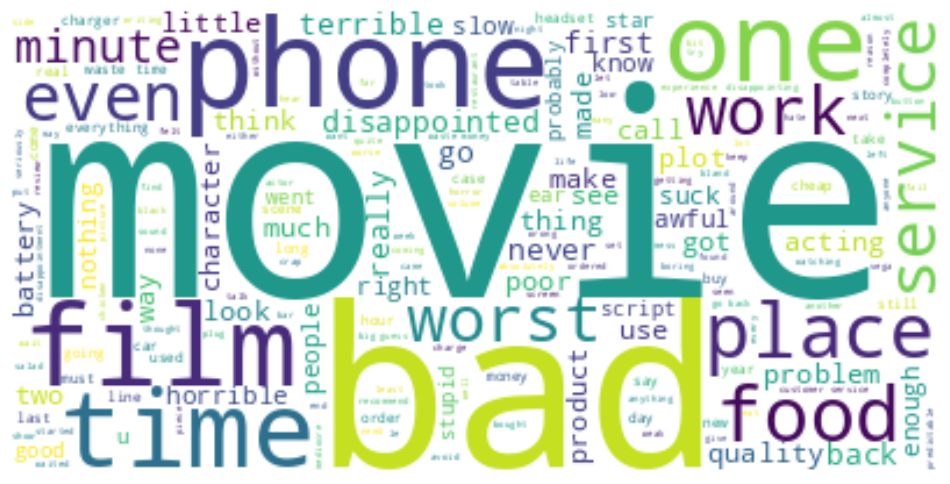

In [ ]:
#Wordcloud of words from negative reviews
neg_tokens = [word for review in negative_reviews['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

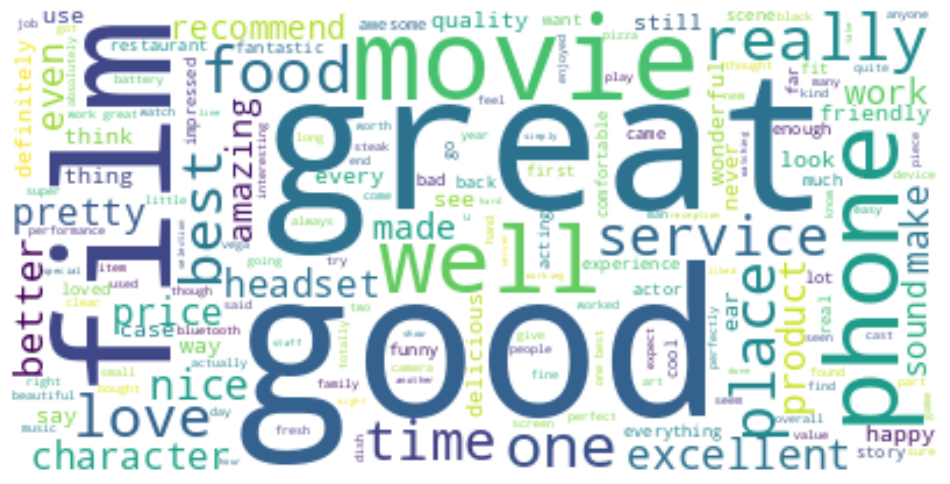

In [ ]:
#Wordcloud of words from positive reviews by product
pos_tokens = [word for review in positive_reviews['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#use the nltk FreqDist and then tabulate
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

  good  great   film  movie   like  phone    one   well   best really 
   215    204    119    116    102     95     84     83     75     74 


In [ ]:
#use the nltk FreqDist and then tabulate
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

  movie     bad   phone    time     one    film   place    food service    back 
     95      83      80      69      64      64      54      54      50      46 


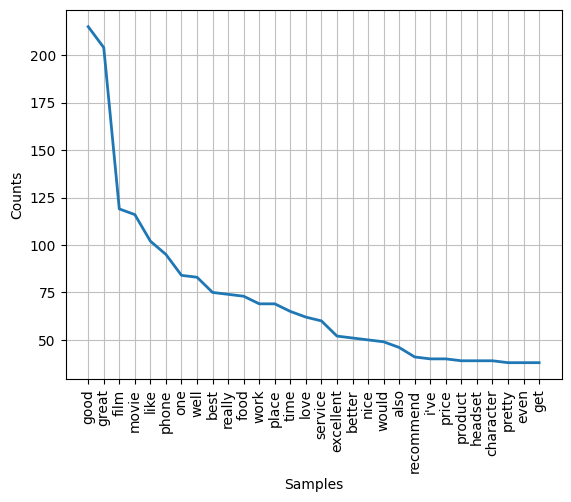

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
pos_freqdist.plot(30)

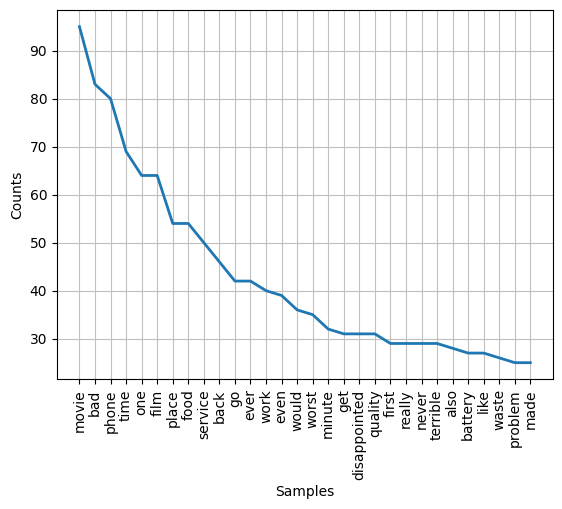

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
neg_freqdist.plot(30)

In [ ]:
#create a binary target variable based on the compound scores obtained from sentiment analysis.
#If the compound score is greater than 0, the target is set to 1; otherwise, it is set to 0.
reviews_df1['Target'] = reviews_df1['compound'].apply(lambda x: 1 if x > 0 else 0)

#select only the 'processed_review' and 'Target' columns
reviews_df2 = reviews_df1[['processed_review', 'Target']]

In [ ]:
reviews_df2.head()

,processed_review,Target
0,"[way, plug, u, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tied, charger, conversation, lasting, minute,...",0
4,"[mic, great]",1


In [ ]:
#Check the count of each target label
target_class = reviews_df2 ['Target'].value_counts()
target_class

1    1463
0    1285
Name: Target, dtype: int64

<Axes: >

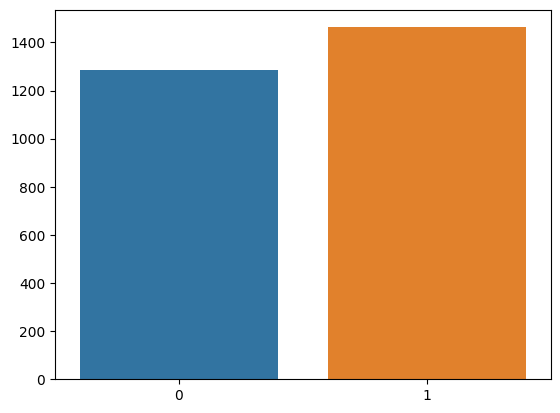

In [ ]:
#Check the class balance
sns.barplot(x=target_class.index, y=target_class.values)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(reviews_df2['processed_review'].map(' '.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#split the dataset to train and test set
from sklearn.model_selection import train_test_split
y = reviews_df2['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=99)

<Axes: xlabel='Target', ylabel='count'>

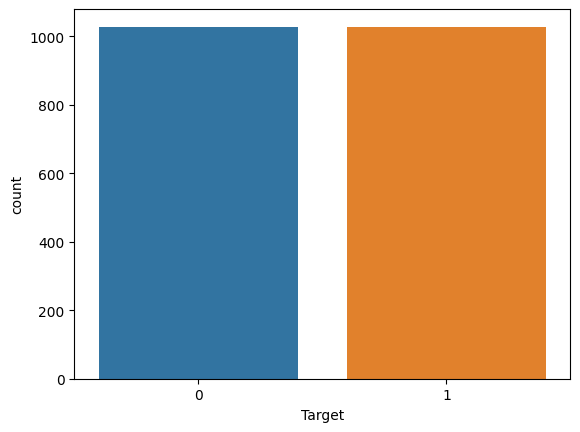

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train_undersampled)

In [ ]:
#fit naive_bayes algorithm to the train set
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [ ]:
#Apply the trained model to the test set
y_pred = model.predict(X_test)

In [ ]:
#Check the accuracy of the model and the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)


accuracy:0.82


Confusion Matrix:
[[197  60]
 [ 38 255]] 


------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       257
           1       0.81      0.87      0.84       293

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550



In [ ]:
#fit SVC algorithm to the train set

from sklearn.svm import LinearSVC
model_SVC = LinearSVC()
model_SVC.fit(X_train_undersampled, y_train_undersampled)

LinearSVC()

In [ ]:
y_pred2 = model_SVC.predict(X_test)

In [ ]:
#Check the accuracy of the model and the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred2)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm,'\n\n')
print('------------------------------------------')
result = metrics.classification_report(y_test, y_pred2)
print("Classification Report:\n",)
print (result)

accuracy:0.90


Confusion Matrix:
[[238  19]
 [ 37 256]] 


------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.89       257
           1       0.93      0.87      0.90       293

    accuracy                           0.90       550
   macro avg       0.90      0.90      0.90       550
weighted avg       0.90      0.90      0.90       550

